 Математика для Data Science
 
 Домашняя работа № 1 / Вектор
 
 Иванов Денис
 

1. Даны вектора x=(1,1), y=(2, 0) и z = (0,2)

Изобразить вектора на экране
Изобразить точку x + y + z
Найти угол между векторами x и y

In [1]:
import numpy as np
import matplotlib.pyplot as plt

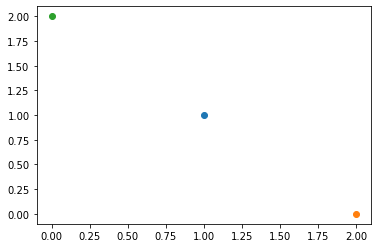

In [9]:
# изобразить вектора на экране можно так:
x = np.array([1,1])
y = np.array([2,0])
z = np.array([0,2])

plt.plot(x[0], x[1], 'o')
plt.plot(y[0], y[1], 'o')
plt.plot(z[0], z[1], 'o')
plt.show()

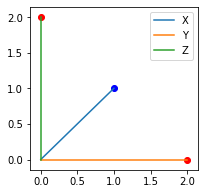

In [11]:
# или так:
fig = plt.figure(figsize=(3, 3))
ax = fig.gca()

x = np.array([1,1])
y = np.array([2,0])
z = np.array([0,2])

ax.plot([0,x[0]], [0,x[1]])
ax.plot([0,y[0]], [0,y[1]])
ax.plot([0,z[0]], [0,z[1]])

ax.scatter(x[0], x[1], c='b', marker='o')
ax.scatter(y[0], y[1], c='r', marker='o')
ax.scatter(z[0], z[1], c='r', marker='o')
ax.legend(['X', 'Y', 'Z'])

plt.show()

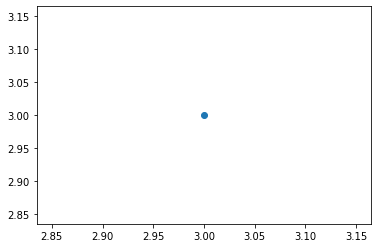

In [3]:
# точка x + y + z
a = x+y+z
plt.plot(a[0], a[1], 'o')
plt.show()

In [46]:
def angle(x, y):
    xLength = np.linalg.norm(x)
    yLength = np.linalg.norm(y)    
    cosine = np.dot(x, y) / (xLength * yLength)
    angle = np.rad2deg(np.arccos(cosine))
    return angle

print('Угол между векторами x и y: ', angle(x,y).round(2))

Угол между векторами x и y:  45.0


2. Даны дома из Бостона
Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)
Написать код разложения дома по указанному базису

In [33]:
import pandas as pd
from sklearn.datasets import load_boston
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.shape

(506, 14)

In [34]:
data = data.dropna()
data = data.drop_duplicates()
data.drop('MEDV', axis=1, inplace = True)
data.shape

(506, 13)

In [44]:
data['DETERM'] = np.nan
for i in range (len(data)-13):
    data.iloc[i,13] = np.linalg.det(data.iloc[i:i+13,0:13])
    
print('Для формирования базиса в прострастве признаков дома выявлено ', 
      data.DETERM[(data.DETERM!=0)&(~data.DETERM.isna())].shape[0], 
      'вариантов последовательных записей,  \n', 'которые начинаются с индексов: ',
      data.DETERM[(data.DETERM!=0)&(~data.DETERM.isna())].index)

Для формирования базиса в прострастве признаков дома выявлено  59 вариантов последовательных записей,  
 которые начинаются с индексов:  Int64Index([196, 197, 198, 199, 200, 201, 202, 203, 204, 226, 227, 228, 229,
            230, 231, 232, 233, 234, 235, 236, 257, 258, 259, 260, 261, 262,
            263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
            276, 277, 278, 279, 280, 281, 282, 283, 344, 345, 346, 347, 348,
            349, 350, 351, 352, 353, 354, 355],
           dtype='int64')


In [109]:
# Код разложения вектора [0] по одному из базисов
np.linalg.solve(data.iloc[196:196+13,0:13], data.iloc[:1,:13].T)

array([[ 1.19650008e+04],
       [ 1.17449041e+14],
       [ 1.81582002e+15],
       [ 1.77203629e+02],
       [-2.36880908e+16],
       [ 7.82224466e+02],
       [ 5.85585110e+01],
       [-8.58014587e+03],
       [-2.52032350e+14],
       [ 1.70828583e+13],
       [-6.11283868e+14],
       [-8.80103422e+00],
       [-9.74226816e+01]])